In [114]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import precision_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
data=pd.read_csv('/Users/sary/Documents/Machine Learning/Diplomado ML/Proyectos/Prediccion de masas tumorales/mammographic_data.csv')

In [3]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
data.shape

(961, 6)

In [5]:
del data['BI-RADS']

In [6]:
data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       956 non-null    float64
 1   Shape     930 non-null    float64
 2   Margin    913 non-null    float64
 3   Density   885 non-null    float64
 4   Severity  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


In [8]:
data.isnull().sum()

Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [9]:
data.Age=pd.to_numeric(data.Age,errors='coerce')
data.Shape=pd.to_numeric(data.Shape,errors='coerce')
data.Margin=pd.to_numeric(data.Margin,errors='coerce')
data.Density=pd.to_numeric(data.Density,errors='coerce')
data.Severity=pd.to_numeric(data.Severity,errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       956 non-null    float64
 1   Shape     930 non-null    float64
 2   Margin    913 non-null    float64
 3   Density   885 non-null    float64
 4   Severity  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


In [11]:
data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [12]:
data.isnull().sum()

Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [13]:
data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [14]:
data.Severity.value_counts(normalize=True)

0    0.536941
1    0.463059
Name: Severity, dtype: float64

# Regresión Logística

In [15]:
y=data.Severity
del data['Severity']
x=data

In [16]:
#1.KNNImputer
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                  LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=KFold(n_splits=10)
scores=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std()))

accuracy = 0.788 +/- 0.043


In [17]:
#2.SimpleImputer
pipe=make_pipeline(SimpleImputer(strategy='median'),
                   LogisticRegression(solver='liblinear',class_weight='balanced'))

cv=KFold(n_splits=10)
scores=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std()))

accuracy = 0.788 +/- 0.049


In [18]:
#Hiperparametros con KNNImputer

pipe=make_pipeline(KNNImputer(weights='uniform'),
                   LogisticRegression(solver='liblinear', 
                                      class_weight='balanced'))

espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,15,20],
                'logisticregression__C':[0.001,0.01,0.1,0.5,1,10]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'knnimputer__n_neighbors': 2, 'logisticregression__C': 10}
El mejor valor de la métrica es  0.7939755154639175


In [19]:
#Hiperparametros con SimpleImputer

pipe=make_pipeline(SimpleImputer(strategy='median'),
                   LogisticRegression(solver='liblinear', 
                                      class_weight='balanced'))

espacio_params={'logisticregression__C':[0.001,0.01,0.1,0.5,1,10]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'logisticregression__C': 10}
El mejor valor de la métrica es  0.7971005154639175


In [20]:
stg=SimpleImputer(strategy='median')  
x_c=stg.fit_transform(x)
log_reg=LogisticRegression(C=10, solver='liblinear',class_weight='balanced')
log_r=log_reg.fit(x_c,y)
log_r

LogisticRegression(C=10, class_weight='balanced', solver='liblinear')

In [21]:
pred=log_r.predict(x_c)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       516
           1       0.75      0.84      0.79       445

    accuracy                           0.80       961
   macro avg       0.80      0.80      0.79       961
weighted avg       0.80      0.80      0.80       961



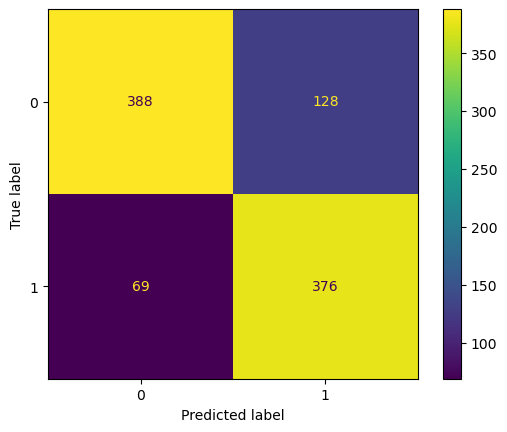

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y,pred)).plot()
plt.show()

In [24]:
log_score=round(log_r.score(x_c,y)*100,2)
print(log_score)

79.5


# SVM

In [25]:
#SimpleImputer
pipe=make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), 
                   LinearSVC(C=1,loss='hinge',dual=True,class_weight='balanced',max_iter=5000))

cv=KFold(n_splits=10)
scores=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy = {:.4f} +/- {:.4f}'.format(scores.mean(), scores.std()))

Accuracy = 0.7826 +/- 0.0423


In [26]:
#Hiperparametros
espacio_params={'linearsvc__C':[0.001,0.01,0.1,1,10,15,20,100,100],
               'linearsvc__max_iter':[1000,2500,5000,10000,15000,20000,30000]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: Conv

La mejor configuración del parámetro de regularización es  {'linearsvc__C': 0.1, 'linearsvc__max_iter': 20000}
El mejor valor de la métrica es  0.787768470790378


/Users/sary/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
#KNNImputer
pipe=make_pipeline(KNNImputer(n_neighbors=9, weights='uniform'), StandardScaler(), 
                   LinearSVC(C=1, loss='hinge',dual=True,class_weight='balanced',max_iter=5000000))

espacio_params={'knnimputer__n_neighbors':[2,3,4,5,7,8,10,12,15,20],
                'linearsvc__C':[0.001,0.01,0.1,1,10,15,20,100]}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'knnimputer__n_neighbors': 2, 'linearsvc__C': 1}
El mejor valor de la métrica es  0.7887993986254295


In [29]:
#Rellenar datos
imputer=KNNImputer(n_neighbors=2,weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

svc_model=LinearSVC(C=1,dual=True,class_weight='balanced',max_iter=2000)
svc_model.fit(x_completos,y)
svc_model

LinearSVC(C=1, class_weight='balanced', dual=True, max_iter=2000)

In [30]:
y_pred=svc_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       516
           1       0.74      0.87      0.80       445

    accuracy                           0.80       961
   macro avg       0.81      0.80      0.80       961
weighted avg       0.81      0.80      0.80       961



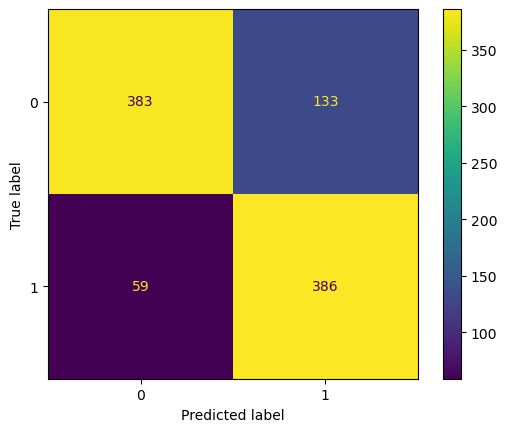

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [32]:
svc_score=round(svc_model.score(x_completos,y)*100,2)
print(svc_score)

80.02


# SVM con Kernel

In [33]:
#KNNImputer
pipe=make_pipeline(KNNImputer(n_neighbors=10, weights='uniform'),
                   StandardScaler(), SVC(C=1,kernel='rbf',
                                         gamma=1,class_weight='balanced')) 

cv=KFold(n_splits=10)
scores=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy = {:.4f} +/- {:.4f}'.format(scores.mean(), scores.std()))

Accuracy = 0.7867 +/- 0.0381


In [34]:
#Hiperparametros
espacio_param={'knnimputer__n_neighbors':[2,4,6,8,10,12,15,20],
               'svc__C':[0.001,0.01,0.1,1,10,15,20,100],
               'svc__gamma':[0.001,0.01,0.1,1,10,15,20,100]}

grid=GridSearchCV(pipe,param_grid=espacio_param,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'knnimputer__n_neighbors': 2, 'svc__C': 100, 'svc__gamma': 0.01}
El mejor valor de la métrica es  0.8043814432989691


In [35]:
#SimpleImputer
pipe=make_pipeline(SimpleImputer(strategy='median'), 
                   StandardScaler(), 
                   SVC(kernel='rbf',class_weight='balanced'))

espacio_param={'svc__C':[0.001,0.01,0.1,1,10,15,20,100],
               'svc__gamma':[0.001,0.01,0.1,1,10,15,20,100]}

grid=GridSearchCV(pipe,param_grid=espacio_param,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor configuración del parámetro de regularización es ',grid.best_params_)
print('El mejor valor de la métrica es ',grid.best_score_)

La mejor configuración del parámetro de regularización es  {'svc__C': 100, 'svc__gamma': 0.01}
El mejor valor de la métrica es  0.8002147766323023


In [36]:
#Rellenar datos
imputer=KNNImputer(n_neighbors=2,weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

#Escalar datos
scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

svc_model=SVC(C=100,kernel='rbf',gamma=0.01,class_weight='balanced')
svc_model.fit(x_completos,y)
svc_model

SVC(C=100, class_weight='balanced', gamma=0.01)

In [37]:
y_pred=svc_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       516
           1       0.78      0.84      0.81       445

    accuracy                           0.81       961
   macro avg       0.81      0.81      0.81       961
weighted avg       0.82      0.81      0.81       961



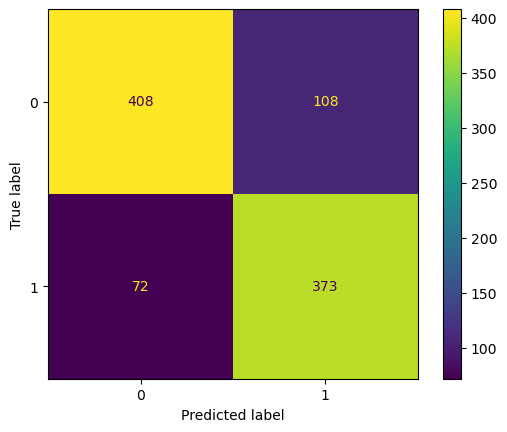

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [112]:
svc_kscore=round(svc_model.score(x_completos,y)*100,2)
print(svc_score)

81.27


# Arboles de decision 

In [40]:
pipe=make_pipeline(KNNImputer(n_neighbors=10, weights='uniform'),
                   DecisionTreeClassifier(class_weight='balanced'))

cv=KFold(n_splits=10)
score=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy = {:.4f}+/-{:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7555+/-0.0353


In [41]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,14,16,18,20],
                'decisiontreeclassifier__max_depth':np.arange(2,15,1),
                'decisiontreeclassifier__min_samples_leaf':np.arange(5,20,1)}

grid=GridSearchCV(pipe,param_grid=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor calibracion de los hiperparametros es ',grid.best_params_)
print('Mejor valor de la metrica ',grid.best_score_)

La mejor calibracion de los hiperparametros es  {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 7, 'knnimputer__n_neighbors': 2}
Mejor valor de la metrica  0.8075386597938146


In [42]:
#Rellenar y escalar
imputer=KNNImputer(n_neighbors=2, weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

tree_model=DecisionTreeClassifier(max_depth=5,min_samples_leaf=7,
                                 class_weight='balanced')
tree_model.fit(x_completos,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=7)

In [43]:
y_pred=tree_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       516
           1       0.78      0.86      0.82       445

    accuracy                           0.82       961
   macro avg       0.82      0.83      0.82       961
weighted avg       0.83      0.82      0.82       961



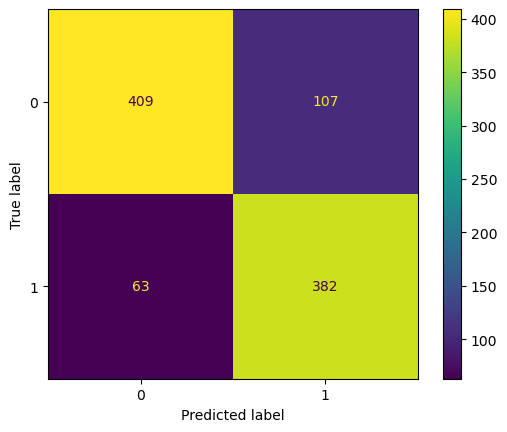

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [45]:
tree_score=round(tree_model.score(x_completos,y)*100,2)
print(tree_score)

82.31


# Bosque aleatorio

In [46]:
pipe=make_pipeline(KNNImputer(n_neighbors=10, weights='uniform'),
                  RandomForestClassifier(n_estimators=100,class_weight='balanced'))

cv=KFold(n_splits=10)
score=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy = {:.4f} +/- {:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7586 +/- 0.0441


In [48]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,14,16,18,20],
                'randomforestclassifier__max_depth':np.arange(5,20,1),
                'randomforestclassifier__min_samples_leaf':np.arange(5,20,1)}

grid=RandomizedSearchCV(pipe,param_distributions=espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor calibracion de hiperparametros es ',grid.best_params_)
print('Mejor valor de la metrica ',grid.best_score_)

La mejor calibracion de hiperparametros es  {'randomforestclassifier__min_samples_leaf': 12, 'randomforestclassifier__max_depth': 9, 'knnimputer__n_neighbors': 16}
Mejor valor de la metrica  0.8085266323024054


In [49]:
#Rellenar y escalar datos
imputer=KNNImputer(n_neighbors=16,weights='uniform')
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

rf_model=RandomForestClassifier(n_estimators=100,class_weight='balanced', 
                                max_depth=9,min_samples_leaf=12)
rf_model.fit(x_completos,y)

RandomForestClassifier(class_weight='balanced', max_depth=9,
                       min_samples_leaf=12)

In [50]:
y_pred=rf_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       516
           1       0.78      0.85      0.81       445

    accuracy                           0.82       961
   macro avg       0.82      0.82      0.82       961
weighted avg       0.82      0.82      0.82       961



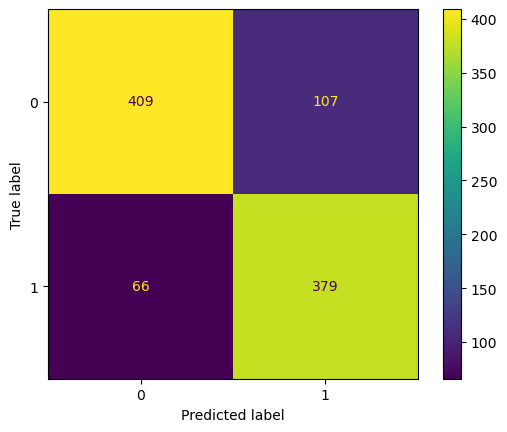

In [51]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [52]:
rf_score=round(rf_model.score(x_completos,y)*100,2)
print(rf_score)

82.0


In [53]:
#Numero adecuado de arboles
score_oob=pd.DataFrame()
oob_score=[]
n_trees=np.arange(100,500+1,10)
for n in n_trees:
    randomf=RandomForestClassifier(max_depth= 8, min_samples_leaf= 1, n_estimators=n,
                                   class_weight='balanced',oob_score=True,n_jobs=-1)
    randomf.fit(x_completos,y)
    oob_score.append(randomf.oob_score_)
score_oob['Num_of_trees']=n_trees
score_oob['oob_score']=oob_score
score_oob.head()

,Num_of_trees,oob_score
0,100,0.801249
1,110,0.800208
2,120,0.807492
3,130,0.805411
4,140,0.797086


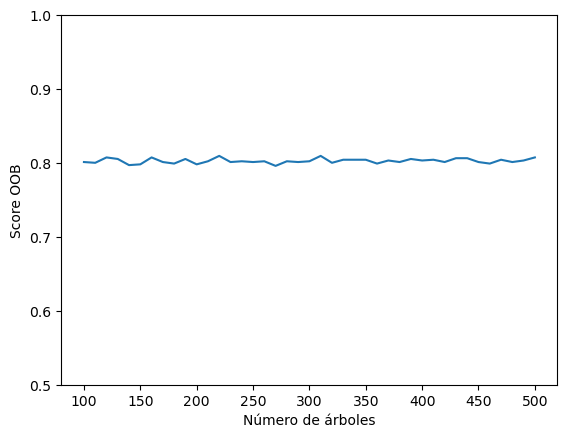

In [54]:
plt.plot(score_oob['Num_of_trees'],score_oob['oob_score'])
plt.ylim(0.5,1)
plt.xlabel('Número de árboles')
plt.ylabel('Score OOB')
plt.show()

# XGBoosting

In [55]:
pipe=make_pipeline(KNNImputer(n_neighbors=10,weights='uniform'),
                   XGBClassifier(n_estimators=100))

cv=KFold(n_splits=10)
score=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy = {:.4f}+/-{:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7691+/-0.0381


In [56]:
#Hiperparametros
espacio_params={'knnimputer__n_neighbors':[2,4,6,8,10,12,14,16,18,20],
                'xgbclassifier__learning_rate':[0.001,0.01,0.1,0.5,1],
                'xgbclassifier__subsample':[0.5,0.6,0.7,0.8,1],
                'xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9],
                'xgbclassifier__max_depth':[2,4,6,8,10,12,14,16,18,20]}

grid=RandomizedSearchCV(pipe,param_distributions=espacio_params,n_iter=200,
                        scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)
print('La mejor calibracion de los hiperparametros es ',grid.best_params_)
print('Mejor valor de la metrica ',grid.best_score_)

La mejor calibracion de los hiperparametros es  {'xgbclassifier__subsample': 0.8, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.001, 'xgbclassifier__colsample_bytree': 0.6, 'knnimputer__n_neighbors': 10}
Mejor valor de la metrica  0.8147873711340207


In [57]:
#Rellenar y escalar datos
imputer=KNNImputer(n_neighbors=10)
x_completos=imputer.fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

xgb_model=XGBClassifier(n_estimators=200, subsample=0.8,
                        max_depth=4,learning_rate=0.001,
                        colsample_bytree=0.6)

xgb_model.fit(x_completos,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
y_pred=xgb_model.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       516
           1       0.79      0.85      0.82       445

    accuracy                           0.83       961
   macro avg       0.83      0.83      0.82       961
weighted avg       0.83      0.83      0.83       961



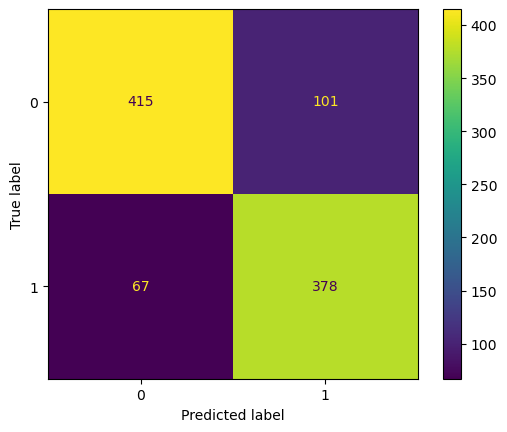

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [60]:
xgb_score=round(xgb_model.score(x_completos,y)*100,2)
print(xgb_score)

82.52


# KNN Ponderados

In [61]:
pipe=make_pipeline(SimpleImputer(strategy='median'),
                  StandardScaler(),
                  KNeighborsClassifier(weights='distance'))

cv=KFold(n_splits=10)
score=cross_val_score(pipe,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy = {:.4f}+/-{:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7514+/-0.0416


In [62]:
#Hiperparametros
espacio_params={'kneighborsclassifier__n_neighbors':[2,4,6,8,10,15,20,30,40,50],
                'kneighborsclassifier__p':[1,2,3,4,5,6,7,8,9,10]}

pipe=make_pipeline(SimpleImputer(strategy='median'),
                  StandardScaler(),
                  KNeighborsClassifier(weights='distance'))

cv=KFold(n_splits=10)
grid=GridSearchCV(pipe,espacio_params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x,y)

print('La mejor calibracion de los hiperparametros es ',grid.best_params_)
print('Mejor valor de la metrica ',grid.best_score_)

La mejor calibracion de los hiperparametros es  {'kneighborsclassifier__n_neighbors': 40, 'kneighborsclassifier__p': 1}
Mejor valor de la metrica  0.7762779209621993


In [63]:
knn_p=KNeighborsClassifier(n_neighbors=40, weights='distance', p=1)

In [64]:
#Rellenar datos
x_completos=SimpleImputer(strategy='median').fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

knn_p.fit(x_completos,y)

KNeighborsClassifier(n_neighbors=40, p=1, weights='distance')

In [65]:
y_pred=knn_p.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       516
           1       0.90      0.88      0.89       445

    accuracy                           0.90       961
   macro avg       0.90      0.90      0.90       961
weighted avg       0.90      0.90      0.90       961



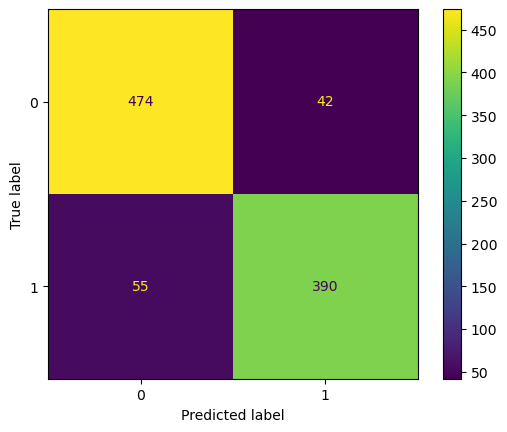

In [66]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [67]:
knp_score=round(knn_p.score(x_completos,y)*100,2)
print(knp_score)

89.91


# Naive-Bayes

In [68]:
cv=KFold(n_splits=10)
pipe=make_pipeline(SimpleImputer(strategy='median'),
                  GaussianNB())

score=cross_val_score(pipe,x,y,cv=cv,scoring='accuracy',n_jobs=-1)

print('Accuracy = {:.4f}+/-{:.4f}'.format(score.mean(),score.std()))

Accuracy = 0.7805+/-0.0428


In [69]:
nb=GaussianNB()

#Rellenar datos
x_completos=SimpleImputer(strategy='median').fit_transform(x)
x_completos=pd.DataFrame(x_completos)

scale=StandardScaler()
x_completos=scale.fit_transform(x_completos)
x_completos=pd.DataFrame(x_completos)

nb.fit(x_completos,y)

GaussianNB()

In [70]:
y_pred=nb.predict(x_completos)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.79       516
           1       0.73      0.84      0.78       445

    accuracy                           0.78       961
   macro avg       0.79      0.79      0.78       961
weighted avg       0.79      0.78      0.78       961



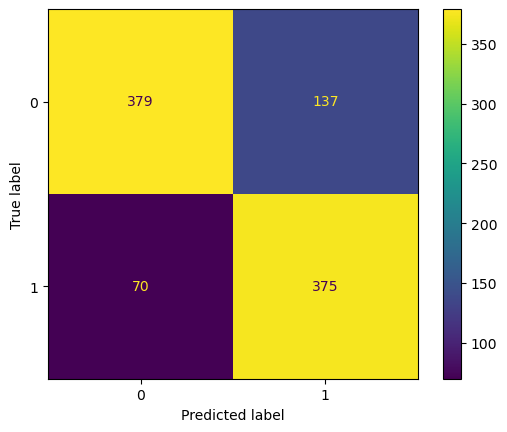

In [71]:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
plt.show()

In [72]:
nb_score=round(nb.score(x_completos,y)*100,2)
print(nb_score)

78.46


# Red Neuronal

In [74]:
imputer=SimpleImputer(strategy='median')
scale=StandardScaler()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

x_train=imputer.fit_transform(x_train)
x_train=scale.fit_transform(x_train)

x_test=imputer.transform(x_test)
x_test=scale.transform(x_test)

In [88]:
#Modelo secuencial
red_neuro=Sequential()
red_neuro.add(Dense(units=10,input_dim=4,activation='relu'))
red_neuro.add(Dense(units=5,activation='relu'))
red_neuro.add(Dense(units=1,activation='sigmoid'))

In [89]:
red_neuro.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

In [90]:
red_neuro.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                50        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [91]:
print('Comenzando entrenamiento')
historial=red_neuro.fit(x_train,y_train,epochs=100,batch_size=10,
                       validation_split=0.2,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


In [92]:
scores=red_neuro.evaluate(x_test,y_test)
print("\n%s: %.2f%%"%(red_neuro.metrics_names[1],scores[1]*100))
print(red_neuro.predict(x_test).round())
y_pred=red_neuro.predict(x_test).round()

7/7 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7876

accuracy: 78.76%
7/7 [==============================] - 0s 1ms/step
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]


In [98]:
rn_score=0.7876

In [93]:
pred=red_neuro.predict(x_test).round()
print(classification_report(y_test,pred,zero_division=0.0))

7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       106
           1       0.74      0.80      0.77        87

    accuracy                           0.79       193
   macro avg       0.79      0.79      0.79       193
weighted avg       0.79      0.79      0.79       193



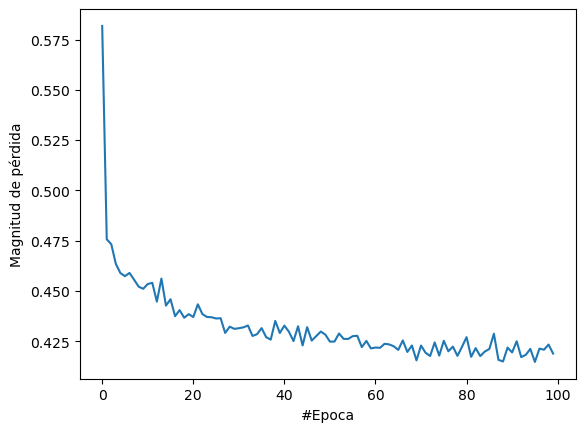

In [95]:
plt.xlabel('#Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

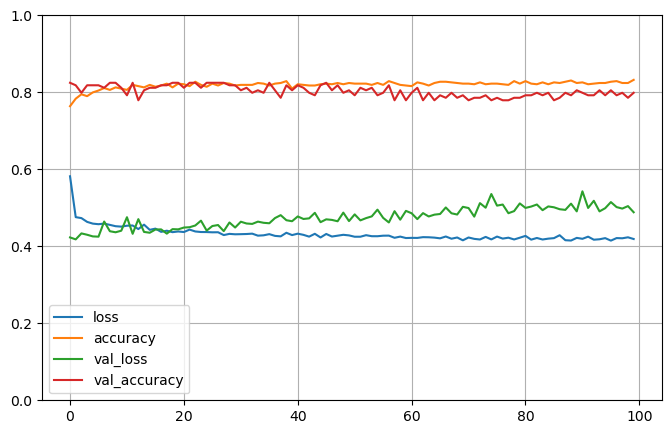

In [97]:
pd.DataFrame(historial.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

# Red Neuronal con Validacion Cruzada

In [100]:
def net_design():
    red_neuro=Sequential()
    red_neuro.add(Dense(units=10,input_dim=4,activation='relu'))
    red_neuro.add(Dense(units=5,activation='relu'))
    red_neuro.add(Dense(units=1,activation='sigmoid'))
    red_neuro.compile(loss='binary_crossentropy',optimizer='adam',
                 metrics='accuracy')
    return red_neuro

In [115]:
red_neuro=KerasClassifier(net_design)
x=data
pipe=make_pipeline(SimpleImputer(strategy='median'),
                  StandardScaler(),red_neuro)
cv_score=cross_val_score(pipe,x,y,cv=10,scoring='accuracy')

3/3 [==============================] - 0s 2ms/step


In [116]:
print(f'Accuracy = {np.mean(cv_score):.4f} +/- {np.std(cv_score):.4f}')

Accuracy = 0.6432 +/- 0.1333


In [117]:
rn_cv=np.mean(cv_score)

In [118]:
modelos=pd.DataFrame({
    'Modelo':['Regresión Logística', 'SVM', 'SVM kernel',
              'Decision-tree', 'Random-Forest',' XGBoost', 
              'KNN ponderados', 'Naive Bayes', 'Red Neuronal',
              'RN cross-val'],
    'Score':[log_score,svc_score,svc_kscore, tree_score, 
             rf_score,xgb_score, knp_score, nb_score, rn_score,rn_cv]
})
modelos.sort_values(by='Score',ascending=False)

,Modelo,Score
6,KNN ponderados,89.910000
5,XGBoost,82.520000
3,Decision-tree,82.310000
4,Random-Forest,82.000000
1,SVM,81.270000
2,SVM kernel,80.960000
0,Regresión Logística,79.500000
7,Naive Bayes,78.460000
8,Red Neuronal,0.787600
9,RN cross-val,0.643192
